In [10]:
import os
import dmd
os.environ["OMP_NUM_THREADS"]='8'
import matplotlib.pyplot as plt
import numpy as np
import timeit
from scipy.linalg import pinv
colors = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]

In [ ]:
N=2000
K=2
seed=1
c=1
t1=50
dt=1E-2
atol=1E-10
fs=np.zeros(N+2)
ns=[0,1,-1]
omega=np.zeros(N)

filebase='data/dmd4'
os.system('mkdir -p %s'%(filebase))
for n in np.arange(len(ns)):
    os.system('rm %s/%i*'%(filebase,n))
    fs[np.argsort(-omega)]=ns[n]*(2*np.pi*np.arange(N)/N-np.pi)
    fs[-2]=-1E-14
    fs[-1]=dt
    fs.tofile('%s/%ifs.dat'%(filebase,n))
    os.system('bash -c "./kuramoto_64 -N %i -K %i -c %f -t %f -d %f -s %i -a %e -g 3 -D 1 -nvR %s/%i"'%(N,K,c,t1,dt,seed,atol,filebase,n))
    omega=np.fromfile('%s/0frequencies.dat'%(filebase),dtype=np.float64)

K=2
c=1.75
filebase='data/dmd5'
os.system('mkdir -p %s'%(filebase))
for n in np.arange(len(ns)):
    os.system('rm %s/%i*'%(filebase,n))
    fs[np.argsort(-omega)]=ns[n]*(2*np.pi*np.arange(N)/N-np.pi)
    fs[-2]=-1E-14
    fs[-1]=dt
    fs.tofile('%s/%ifs.dat'%(filebase,n))
    os.system('bash -c "./kuramoto_64 -N %i -K %i -c %f -t %f -d %f -s %i -a %e -g 3 -D 1 -nvR %s/%i"'%(N,K,c,t1,dt,seed,atol,filebase,n))
    omega=np.fromfile('%s/0frequencies.dat'%(filebase),dtype=np.float64)

K=N
c=1.75
filebase='data/dmd6'
os.system('mkdir -p %s'%(filebase))
for n in np.arange(len(ns)):
    os.system('rm %s/%i*'%(filebase,n))
    fs[np.argsort(-omega)]=ns[n]*(2*np.pi*np.arange(N)/N-np.pi)
    fs[-2]=-1E-14
    fs[-1]=dt
    fs.tofile('%s/%ifs.dat'%(filebase,n))
    os.system('bash -c "./kuramoto_64 -N %i -K %i -c %f -t %f -d %f -s %i -a %e -g 3 -D 1 -nvR %s/%i"'%(N,K,c,t1,dt,seed,atol,filebase,n))
    omega=np.fromfile('%s/0frequencies.dat'%(filebase),dtype=np.float64)

GPU Memory: 11288313856 11536039936 33664000
Using initial conditions from file
Restarting at t=-0.000000 with h=0.010000
Using random frequencies
Using random adjacency matrix
1.000	1.178e+00	-2.194e-04	0.083077	555	
runtime: 1.179151
GPU Memory: 11288313856 11536039936 33664000
Using initial conditions from file
Restarting at t=-0.000000 with h=0.010000
Using random frequencies
Using random adjacency matrix
1.001	1.160e+00	-1.356e-03	0.085977	556	
runtime: 1.160511
GPU Memory: 11288313856 11536039936 33664000
Using initial conditions from file
Restarting at t=-0.000000 with h=0.010000
Using random frequencies
Using random adjacency matrix
1.000	1.155e+00	-2.724e-05	0.087152	556	
runtime: 1.155542
GPU Memory: 11288313856 11536039936 33664000
Using initial conditions from file
Restarting at t=-0.000000 with h=0.010000
Using random frequencies
Using random adjacency matrix
1.000	1.622e+00	-3.480e-04	0.047115	975	
runtime: 1.622903
GPU Memory: 11288313856 11536039936 33664000
Using initi

In [ ]:
# os.system('bash -c "nohup ./sweepdmd.sh &"')

In [3]:
# for D in range(1,6):
    # print(D)
    # os.system('bash -c "nohup ./dmd2.py --D %i --filesuffix %i --filebase data/dmd4/ "'%(D, D))
    # os.system('bash -c "nohup ./dmd2.py --D %i --filesuffix %i --filebase data/dmd5/ "'%(D, D))
    # os.system('bash -c "nohup ./dmd2.py --D %i --filesuffix %i --filebase data/dmd6/ "'%(D, D))

### Input trajectories

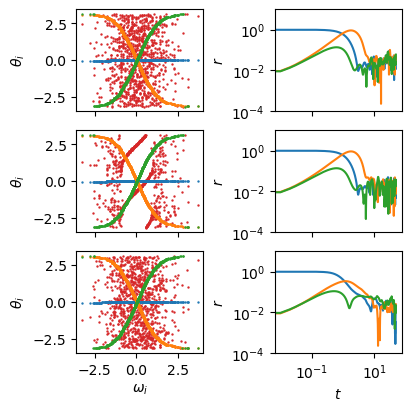

In [4]:
filebases=['data/dmd4/','data/dmd5/','data/dmd6/']
fig,axs=plt.subplots(3,2,figsize=(4,4) ,constrained_layout=True)

numtraj=3

for m in range(len(filebases)):
    # n0s=np.concatenate([[0],np.cumsum(np.load('%s/n0s.npy'%(filebases[m]))-1)])

    for n in range(numtraj):
        filebase='%s/%i'%(filebases[m],n)
        file=open(filebase+'.out')
        lines=file.readlines()
        N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
        N=int(N)
        K=int(K)
        file.close()

    
        omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float64)
        N=len(omega)
        thetas=np.fromfile(filebase+'thetas.dat',dtype=np.float64).reshape((-1,N))
        thetas=thetas-np.mean(omega)*dt*np.arange(thetas.shape[0])[:,np.newaxis]
        orders=np.fromfile(filebase+'order.dat',dtype=np.float64)
    
        plt.subplot(3,2,2+2*m)
        plt.plot(np.arange(len(orders))*dt,orders,c=colors[n],zorder=-5)
        plt.gca().set_rasterization_zorder(0)
        plt.xscale('log')
        plt.yscale('log')
        plt.ylabel('$r$')
        plt.ylim(1E-4,1E1)
        if m<2:
            plt.gca().set_xticklabels([])
        else:
            plt.xlabel('$t$')

        
        plt.subplot(3,2,1+2*m)
        plt.scatter(omega,np.mod(thetas[0]+np.pi,2*np.pi)-np.pi,s=0.5,zorder=-5)
        plt.gca().set_rasterization_zorder(0)
        plt.ylabel(r'$\theta_i$')
        
        if m<2:
            plt.gca().set_xticklabels([])
        else:
            plt.xlabel('$\omega_i$')
    plt.subplot(3,2,1+2*m)
    plt.scatter(omega,np.mod(thetas[-1]+np.pi,2*np.pi)-np.pi,s=0.5,zorder=-6)        
    

# plt.savefig('oscillatordmd1.pdf',dpi=200)
plt.show()

### Mode amplitudes decay exponentially, and order parameter DMD reconstruction is good 

In [27]:
np.real(np.log(evals[inds])/dt)

array([-2.83397664e+00, -2.83397664e+00, -2.18242911e+00, -2.18242911e+00,
       -1.92851735e+00, -1.92851735e+00, -2.25842411e+00, -2.25842411e+00,
       -1.62639853e+00, -1.62639853e+00, -1.98772562e+00, -1.98772562e+00,
       -1.61600222e+00, -1.61600222e+00, -1.78777082e+00, -1.78777082e+00,
       -2.07393909e+00, -2.07393909e+00, -1.52332445e+00, -1.52332445e+00,
       -1.05547905e+00, -1.05547905e+00, -1.42707528e+00, -1.42707528e+00,
       -9.10177199e-01, -9.10177199e-01, -1.66415398e+00, -1.66415398e+00,
       -1.19774534e+00, -1.19774534e+00, -1.39483962e+00, -1.39483962e+00,
       -1.74898540e+00, -1.74898540e+00, -7.82399573e-01, -7.82399573e-01,
       -1.33008590e+00, -1.33008590e+00, -9.93298774e-01, -9.93298774e-01,
       -6.48382658e-01, -6.48382658e-01, -6.30982518e-01, -6.30982518e-01,
       -3.86647472e-01, -3.86647472e-01, -1.58418965e-01, -1.58418965e-01,
       -1.55844515e-01, -1.55844515e-01, -8.67939838e-01, -8.67939838e-01,
       -2.25196100e-01, -

data/dmd4/ 0
data/dmd4/ 1
data/dmd4/ 2
data/dmd5/ 0
data/dmd5/ 1
data/dmd5/ 2
data/dmd6/ 0
data/dmd6/ 1
data/dmd6/ 2


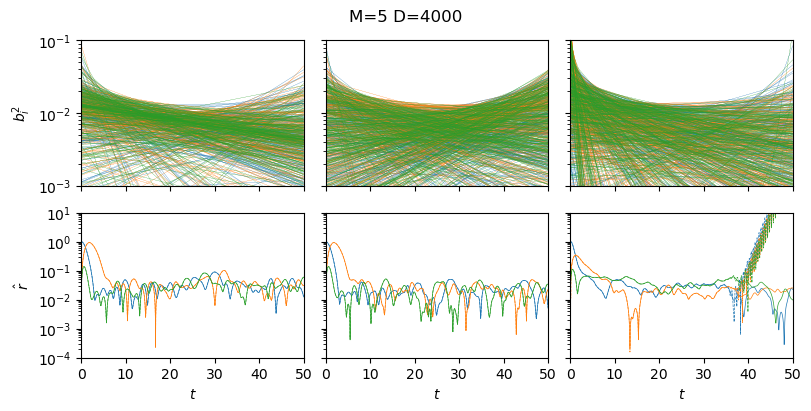

In [28]:
filebases=['data/dmd4/','data/dmd5/','data/dmd6/']

for D in [5]:
    X_reconstructs=[]
    for filebase0 in filebases:
        phis=np.load('%s%iphis.npy'%(filebase0,D))
        bs=np.load('%s%ibs.npy'%(filebase0,D))
        evals=np.load('%s%ievals.npy'%(filebase0,D))
        res=np.load('%s%ires.npy'%(filebase0,D))
        n0s=np.concatenate([[0],np.cumsum(np.load('%s%dn0s.npy'%(filebase0,D))-1)])
        
        inds=np.where(res<1E-8)[0]
        X_reconstruct=np.zeros((bs.shape[0],phis.shape[0]))
        for n in range(numtraj):
            print(filebase0,n)
            n0=n0s[n]
            X_reconstruct[n0:n0s[n+1]]=np.real((bs[n0,inds]*np.linalg.pinv(phis)[inds].T).dot(evals[inds,np.newaxis]**np.arange(n0s[n+1]-n0s[n])[np.newaxis,:])).T
        X_reconstructs=X_reconstructs+[X_reconstruct]

    fig,axs=plt.subplots(2,3,figsize=(8,4),layout='constrained')
    fig.suptitle('M=%i D=%i'%(D,1000*(D-1)))
    for m in range(len(filebases)):
        filebase0=filebases[m]
        bs=np.load('%s/%ibs.npy'%(filebase0,D))
        evals=np.load('%s/%ievals.npy'%(filebase0,D))
        res=np.load('%s/%ires.npy'%(filebase0,D))
        n0s=np.concatenate([[0],np.cumsum(np.load('%s/%in0s.npy'%(filebase0,D))-1)])
        inds=np.where(res<1E-8)[0]
        for n in range(numtraj):
            plt.subplot(2,3,m+1)
            inds2=np.argsort(np.abs(bs[n0s[n],inds]))
            # plt.plot(dt*n0s[n]+np.arange(n0s[n+1]-n0s[n])*dt,np.abs(bs[n0s[n]:n0s[n+1],inds[inds2[-100:]]]),c=colors[n],lw=0.1)
            # plt.plot(np.arange(n0s[n+1]-n0s[n])*dt,np.abs(bs[n0s[n]:n0s[n+1],inds[inds2[-100:]]]),c=colors[n],lw=0.1)
            plt.plot(np.arange(n0s[n+1]-n0s[n])*dt,np.abs(bs[n0s[n]:n0s[n+1],inds[inds2[:]]]),c=colors[n],lw=0.1)
            plt.ylim(1E-3,1E-1)
            plt.yscale('log')
            # plt.xscale('log')
            plt.ylim(1E-3,1E-1)
            plt.xlim(0,50)
            plt.gca().set_xticklabels('')
    
            if m==0:
                plt.ylabel('$b_i^%i$'%(n))
            else:
                plt.gca().set_yticklabels('')
    
            plt.subplot(2,3,m+4)
            X_reconstruct=X_reconstructs[m]
            filebase='%s/%i'%(filebases[m],n)
            orders=np.fromfile(filebase+'order.dat',dtype=np.float64)
            # plt.plot(4*n+np.log((1+np.arange(n0s[n+1]-n0s[n]))*dt)/np.log(10),np.abs(np.mean(X_reconstruct[n0s[n]:n0s[n+1],:N]+1j*X_reconstruct[n0s[n]:n0s[n+1],N:],axis=1)),ls='--',c=colors[n],zorder=-5)
            Ndict=X_reconstruct.shape[1]
            plt.plot(np.arange(n0s[n+1]-n0s[n])*dt,np.abs(np.mean(X_reconstruct[n0s[n]:n0s[n+1],:N]+1j*X_reconstruct[n0s[n]:n0s[n+1],Ndict//2:Ndict//2+N],axis=1)),c=colors[n],ls='--',zorder=-5,lw=0.5)
            plt.plot(np.arange(n0s[n+1]-n0s[n])*dt,orders[:-1],c=colors[n],zorder=-5,lw=0.5)
            plt.gca().set_rasterization_zorder(0)
            # plt.xscale('log')
            plt.yscale('log')
            plt.xlabel('$t$')
            plt.ylim(1E-4,1E1)
            plt.xlim(0,50)
            if m==0:
                plt.ylabel('$\hat{r}$')
            else:
                plt.gca().set_yticklabels('')
                
    plt.savefig('oscillatordmd3_%d.pdf'%D)
    plt.show()

### DMD spectrum and pseudospectrum

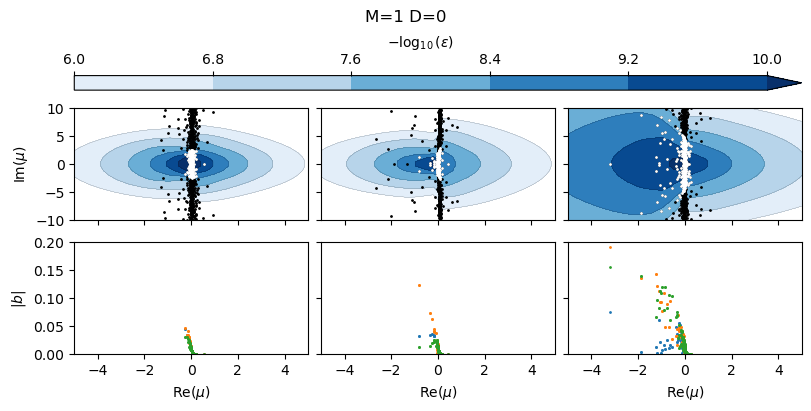

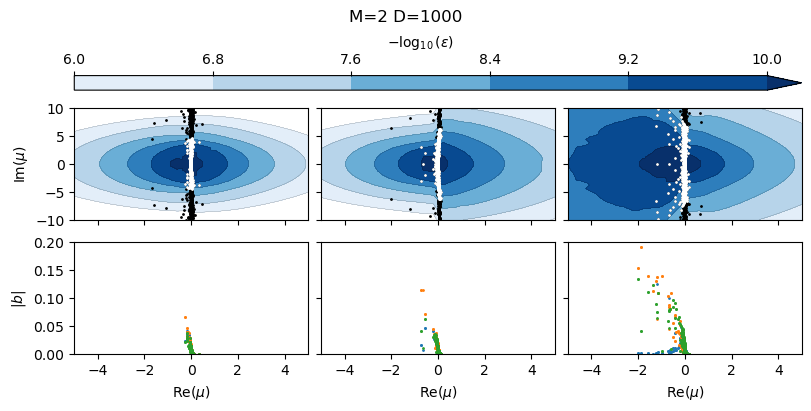

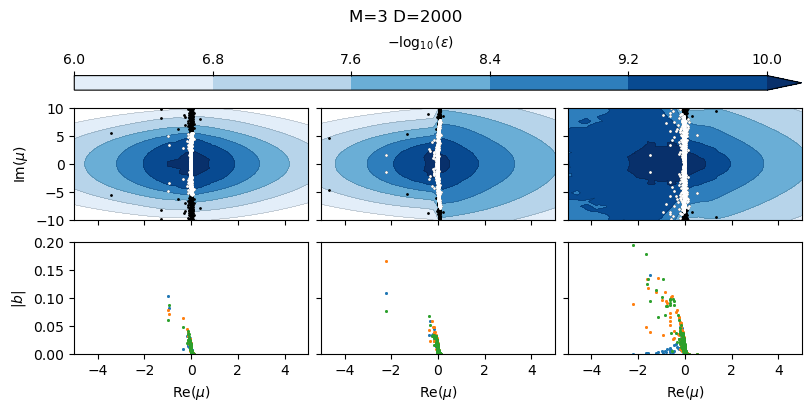

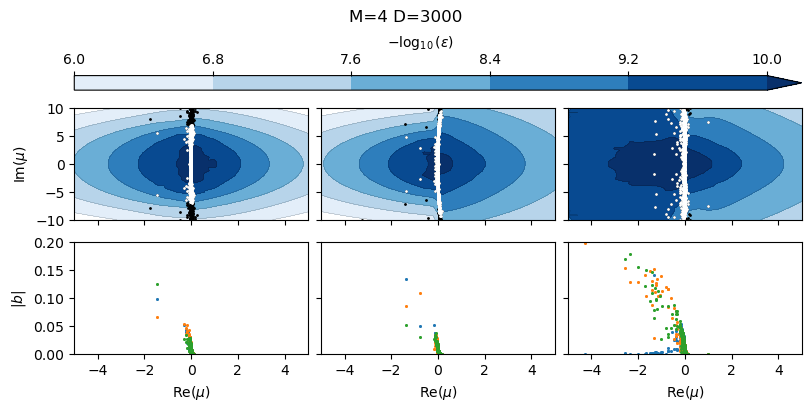

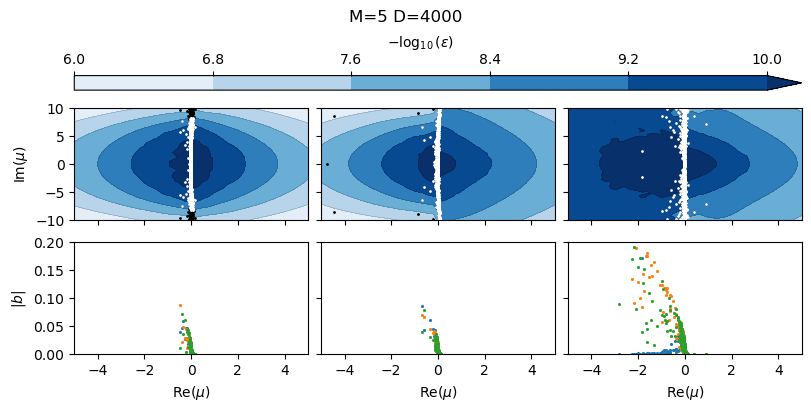

In [30]:
filebases=['data/dmd4/','data/dmd5/','data/dmd6/']
resmin=1E-6
resmax=1E-10
rescrit=1E-8

for D in [1,2,3,4, 5]:
    l=0
    fig,axs=plt.subplots(2,3,figsize=(8,4),layout='constrained')
    fig.suptitle('M=%i D=%i'%(D,1000*(D-1)))
    numtraj=3
    for m in range(len(filebases)):
        filebase0=filebases[m]
        
        bs=np.load(filebase0+str(D)+'bs.npy')
        evals=np.load(filebase0+str(D)+'evals.npy')
        res=np.load(filebase0+str(D)+'res.npy')
        inds=np.where(res<rescrit)[0]
        xs=np.real(np.log(evals)/dt)
        
        plt.subplot(2,3,4+l)
    
        # plt.scatter(xs,np.abs(bs[0]),c='grey',s=2)
        for n in range(numtraj):
            plt.scatter(xs[inds],np.abs(bs[n0s[n]])[inds],c=colors[n],s=1,zorder=-5)
        plt.gca().set_rasterization_zorder(0)
    
        plt.xlabel(r'$\mathrm{Re}(\mu)$')
        plt.xlim(-5,5)
        plt.ylim(0,0.5)
        if l>0:
            plt.gca().set_yticks(plt.gca().get_yticks(),['']*len(plt.gca().get_yticks()))
        else:
            plt.ylabel(r'$|b|$')
        plt.ylim(0,0.2)
    
        pseudo1=np.load('%s/%dpseudo.npy'%(filebase0,D))
        zs1=np.load('%s/%dzs.npy'%(filebase0,D))
        evals1=np.load('%s/%devals.npy'%(filebase0,D))
        res1=np.load('%s/%dres.npy'%(filebase0,D))
        nr=26
        ni=26
        
        levels=-np.log(resmin)/np.log(10)+(-np.log(resmax)/np.log(10)+np.log(resmin)/np.log(10))*np.arange(6)/5
    
        plt.subplot(2,3,1+l)
        cs1 = plt.gca().tricontourf(np.real(np.log(zs1)/dt),np.imag(np.log(zs1)/dt),np.log(1/np.array(pseudo1))/np.log(10),levels=levels,cmap='Blues',extend='max',zorder=-5)
        cs2 = plt.gca().tricontour(cs1,levels=levels,colors=('k',),linewidths=0.1,zorder=-5)
    
        plt.gca().set_rasterization_zorder(0)
        plt.xlim(-5,5)
        plt.ylim(-10,10)
        
        xs1=np.real(np.log(evals1)/dt)
        ys1=np.imag(np.log(evals1)/dt)
    
        inds=np.where(res1<rescrit)[0]
        plt.scatter(xs1,ys1,c='black',s=1,zorder=-5)
        plt.scatter(xs1[inds],ys1[inds],c='white',s=1,zorder=-5)
        
        if l>0:
            plt.gca().set_yticklabels([])
        else:
            plt.ylabel('$\mathrm{Im}({\mu})$')
        plt.gca().set_xticklabels('')
    
        l=l+1
    
    fig.colorbar(cs1, ax=axs[:,:], location='top',aspect=50,label=r'$-\log_{10}(\varepsilon)$')
    
    plt.savefig('oscillatordmd2_%i.pdf'%D,dpi=200)
    plt.show()
    